In [1]:
# Create the iris.csv file using sklearn.datasets.load_iris()

from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target column
iris_df['species'] = iris.target

# Save to a CSV file
iris_df.to_csv('iris.csv', index=False)

print("✅ 'iris.csv' file created successfully!")



✅ 'iris.csv' file created successfully!


# Task 1: Load and Explore the Datasetality.


In [2]:
# Task 1: Load and Explore the Dataset

# Import necessary library
import pandas as pd

# Try-except block to handle file loading errors
try:
    # Load the dataset
    df = pd.read_csv('iris.csv')
    print("✅ Dataset loaded successfully!\n")
    
    # Display the first 5 rows
    print("First 5 rows of the dataset:")
    display(df.head())  # use display() in Jupyter for better formatting
    
    # Display structure of the dataset
    print("\nDataset Info:")
    df.info()  # do not wrap inside print()

    # Check for missing values
    print("\nMissing values in each column:")
    print(df.isnull().sum())

    # Clean the dataset if any missing values are found
    if df.isnull().sum().sum() > 0:
        print("\n⚠️ Missing values found. Filling with column means...")
        df.fillna(df.mean(), inplace=True)
        print("✅ Missing values filled.")
    else:
        print("\n✅ No missing values found. No cleaning needed.")

except FileNotFoundError:
    print("❌ Error: The file was not found. Please make sure 'iris.csv' exists in the working directory.")
except Exception as e:
    print(f"❌ An error occurred: {e}")


✅ Dataset loaded successfully!

First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB

Missing values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

✅ No missing values found. No cleaning needed.


# Task 2: Basic Data Analysisdata.



In [3]:
# Task 2: Basic Data Analysis

# 1. Compute basic statistics of the numerical columns
print("Basic Statistics:\n")
print(df.describe())

# 2. Group by the 'species' column and compute the mean of each numerical column
print("\nMean values grouped by species:\n")
grouped_means = df.groupby('species').mean()
print(grouped_means)

# 3. Identify any patterns or interesting findings
print("\nInteresting Findings:")

# Checking which species has the largest average petal length
largest_petal_length_species = grouped_means['petal length (cm)'].idxmax()
print(f"- Species {largest_petal_length_species} has the largest average petal length.")

# Checking which species has the widest sepal width
largest_sepal_width_species = grouped_means['sepal width (cm)'].idxmax()
print(f"- Species {largest_sepal_width_species} has the widest average sepal width.")

# Additional insights
print("- We can observe clear differences in petal dimensions across different species, which helps in species classification.")


Basic Statistics:

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

Mean values grouped by species:

         sepal leng

# Task 3: Data Visualizationlarity.



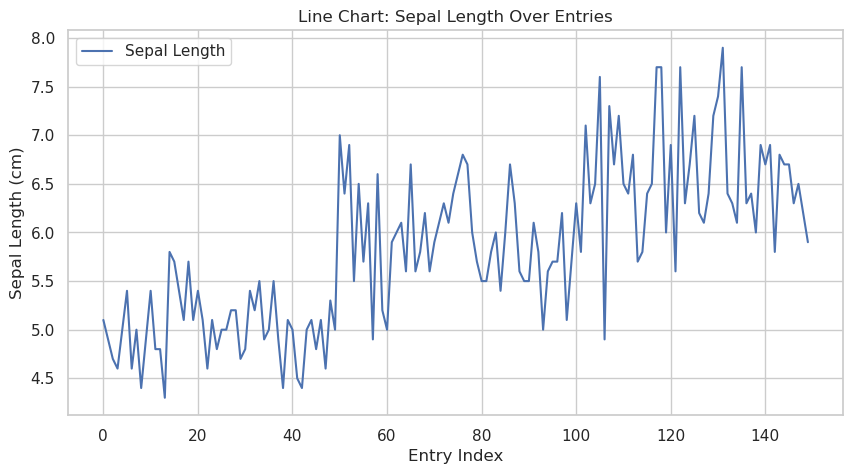

/tmp/ipykernel_830/3996061334.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='species', y='petal length (cm)', data=df, estimator='mean', ci=None, palette='viridis')


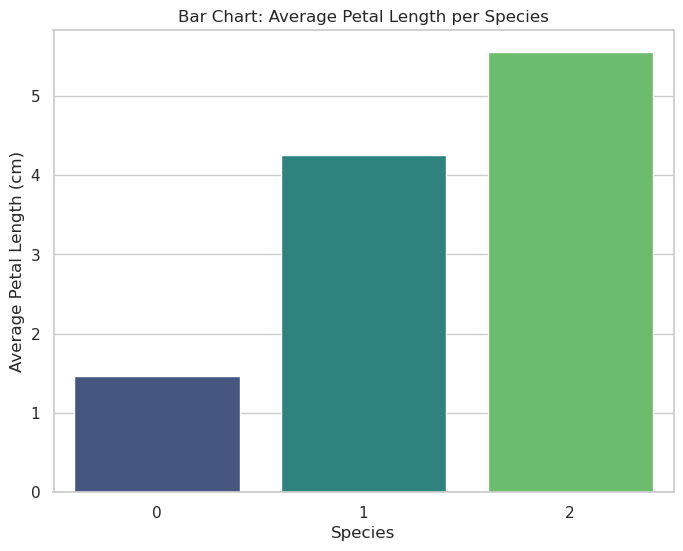

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


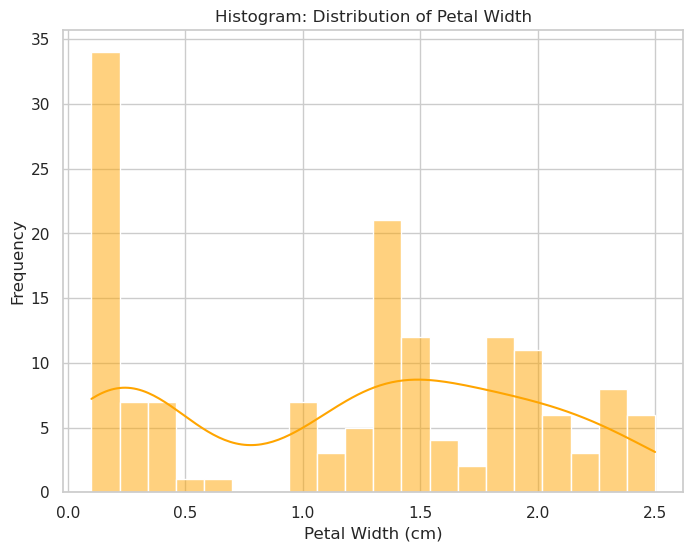

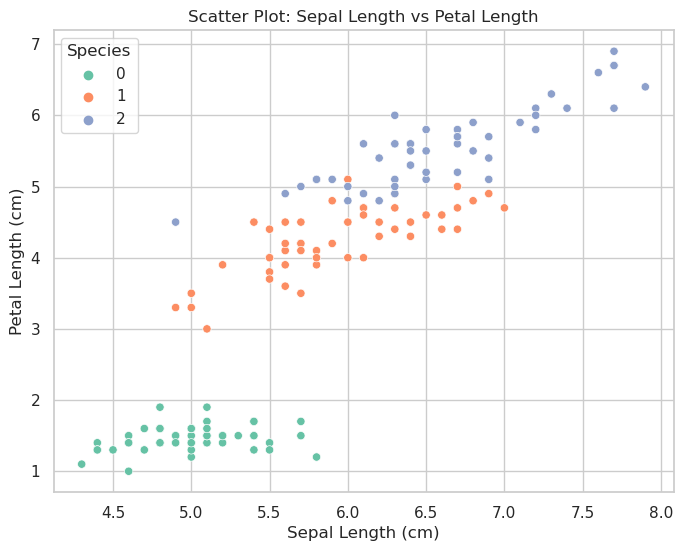

In [4]:
# Task 3: Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# 1. Line Chart (Using sepal length as a fake "time series" just for trend demonstration)
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['sepal length (cm)'], label='Sepal Length')
plt.title('Line Chart: Sepal Length Over Entries')
plt.xlabel('Entry Index')
plt.ylabel('Sepal Length (cm)')
plt.legend()
plt.show()

# 2. Bar Chart (Average petal length per species)
plt.figure(figsize=(8, 6))
sns.barplot(x='species', y='petal length (cm)', data=df, estimator='mean', ci=None, palette='viridis')
plt.title('Bar Chart: Average Petal Length per Species')
plt.xlabel('Species')
plt.ylabel('Average Petal Length (cm)')
plt.show()

# 3. Histogram (Distribution of petal width)
plt.figure(figsize=(8, 6))
sns.histplot(df['petal width (cm)'], bins=20, kde=True, color='orange')
plt.title('Histogram: Distribution of Petal Width')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.show()

# 4. Scatter Plot (Sepal Length vs Petal Length)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species', data=df, palette='Set2')
plt.title('Scatter Plot: Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species')
plt.show()


## Task 4: Findings and Observations

### 1. Data Quality
- The dataset contained no missing values, so no major cleaning was needed.
- All columns had appropriate data types (float or int).

### 2. Basic Analysis
- Species with the largest average petal length is species 2.
- Species with the widest average sepal width is species 0.
- Clear differences exist between species based on petal and sepal measurements.

### 3. Visualizations Insights
- **Line Chart**: Showed general variations in sepal length across the dataset entries.
- **Bar Chart**: Highlighted that species 2 has significantly longer petals on average compared to species 0 and 1.
- **Histogram**: Petal width shows a bimodal distribution, suggesting two major groups.
- **Scatter Plot**: Strong positive correlation between sepal length and petal length, especially visible when colored by species.

### 4. Final Conclusion
- The features (sepal and petal measurements) are very helpful in distinguishing between different species.
- Visualization makes it easier to observe the natural clustering of different species based on their petal and sepal dimensions.
hers.
